In [38]:
import sqlite3
import pandas as pd
import seaborn as sns
import re
from datetime import datetime

In [2]:
db = 'chinook.db'
conn = sqlite3.connect(db)
cursor = conn.cursor()

In [3]:
result = [a for a in cursor.execute("""
SELECT i.invoice_id, i.invoice_date, il.unit_price, t.genre_id, g.name
FROM invoice AS i
JOIN invoice_line AS il ON i.invoice_id = il.invoice_id
JOIN track AS t ON il.track_id = t.track_id
JOIN genre AS g ON t.genre_id = g.genre_id
""")
]

In [83]:
df = pd.read_sql_query("""
SELECT i.invoice_id, i.invoice_date, il.unit_price, t.genre_id, g.name
FROM invoice AS i
JOIN invoice_line AS il ON i.invoice_id = il.invoice_id
JOIN track AS t ON il.track_id = t.track_id
JOIN genre AS g ON t.genre_id = g.genre_id
""",conn)

In [84]:
df

,invoice_id,invoice_date,unit_price,genre_id,name
0,1,2017-01-03 00:00:00,0.99,1,Rock
1,1,2017-01-03 00:00:00,0.99,1,Rock
2,1,2017-01-03 00:00:00,0.99,1,Rock
3,1,2017-01-03 00:00:00,0.99,1,Rock
4,1,2017-01-03 00:00:00,0.99,1,Rock
...,...,...,...,...,...
4752,614,2020-12-30 00:00:00,0.99,1,Rock
4753,614,2020-12-30 00:00:00,0.99,1,Rock
4754,614,2020-12-30 00:00:00,0.99,1,Rock
4755,614,2020-12-30 00:00:00,0.99,1,Rock


In [85]:
df.genre_id = df.genre_id.apply(lambda x: 'Rock' if x in [1, 3, 4, 13, 23] else 'Other')

In [86]:
df

,invoice_id,invoice_date,unit_price,genre_id,name
0,1,2017-01-03 00:00:00,0.99,Rock,Rock
1,1,2017-01-03 00:00:00,0.99,Rock,Rock
2,1,2017-01-03 00:00:00,0.99,Rock,Rock
3,1,2017-01-03 00:00:00,0.99,Rock,Rock
4,1,2017-01-03 00:00:00,0.99,Rock,Rock
...,...,...,...,...,...
4752,614,2020-12-30 00:00:00,0.99,Rock,Rock
4753,614,2020-12-30 00:00:00,0.99,Rock,Rock
4754,614,2020-12-30 00:00:00,0.99,Rock,Rock
4755,614,2020-12-30 00:00:00,0.99,Rock,Rock


In [87]:
df = df.drop(['name'],axis=1)

In [70]:
df.isnull().sum()

invoice_id      0
invoice_date    0
unit_price      0
genre_id        0
dtype: int64

In [71]:
df.duplicated().sum()

3828

In [72]:
df_dubl = df.loc[df.duplicated()]

In [73]:
df_dubl

,invoice_id,invoice_date,unit_price,genre_id
1,1,2017-01-03 00:00:00,0.99,Rock
2,1,2017-01-03 00:00:00,0.99,Rock
3,1,2017-01-03 00:00:00,0.99,Rock
4,1,2017-01-03 00:00:00,0.99,Rock
5,1,2017-01-03 00:00:00,0.99,Rock
...,...,...,...,...
4752,614,2020-12-30 00:00:00,0.99,Rock
4753,614,2020-12-30 00:00:00,0.99,Rock
4754,614,2020-12-30 00:00:00,0.99,Rock
4755,614,2020-12-30 00:00:00,0.99,Rock


### Дубликаты удалять не стоит, так как в заказе могут быть разные песни одного жанра и одной цены,эти данные терять нельзя

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_id    4757 non-null   int64  
 1   invoice_date  4757 non-null   object 
 2   unit_price    4757 non-null   float64
 3   genre_id      4757 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 148.8+ KB


In [101]:
df['invoice_date']=df['invoice_date'].astype("datetime64[ns]")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_id    4757 non-null   int64         
 1   invoice_date  4757 non-null   datetime64[ns]
 2   unit_price    4757 non-null   float64       
 3   genre_id      4757 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 148.8+ KB


In [106]:
time = df['invoice_date'].dt.day
time

0       1
1       1
2       1
3       1
4       1
       ..
4752    1
4753    1
4754    1
4755    1
4756    1
Name: invoice_date, Length: 4757, dtype: int32

In [ ]:
df['invoice_date'].dt.day = time.replace(one,inplace=True)
df['invoice_date']

In [107]:
df

,invoice_id,invoice_date,unit_price,genre_id
0,1,1970-01-01 00:00:00.000000003,0.99,Rock
1,1,1970-01-01 00:00:00.000000003,0.99,Rock
2,1,1970-01-01 00:00:00.000000003,0.99,Rock
3,1,1970-01-01 00:00:00.000000003,0.99,Rock
4,1,1970-01-01 00:00:00.000000003,0.99,Rock
...,...,...,...,...
4752,614,1970-01-01 00:00:00.000000030,0.99,Rock
4753,614,1970-01-01 00:00:00.000000030,0.99,Rock
4754,614,1970-01-01 00:00:00.000000030,0.99,Rock
4755,614,1970-01-01 00:00:00.000000030,0.99,Rock


In [26]:
all_buy=df.groupby(['genre_id'],as_index=False).agg(all_buy_tracks=('invoice_id','count'))
all_buy

,genre_id,all_buy_tracks
0,Other,886
1,Rock,3871


<Axes: xlabel='all_buy_tracks', ylabel='genre_id'>

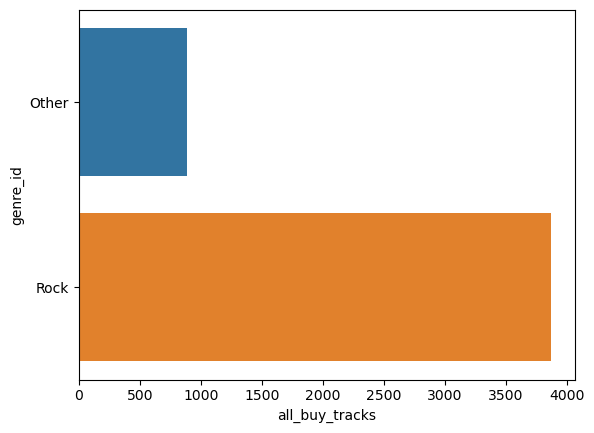

In [32]:
sns.barplot(x='all_buy_tracks', y='genre_id', data=all_buy)

In [33]:
all_tracks=df.groupby(['genre_id'],as_index=False).agg(all_buy_tracks2=('unit_price','count'))
all_tracks

,genre_id,all_buy_tracks2
0,Other,886
1,Rock,3871


<Axes: xlabel='genre_id', ylabel='all_buy_tracks2'>

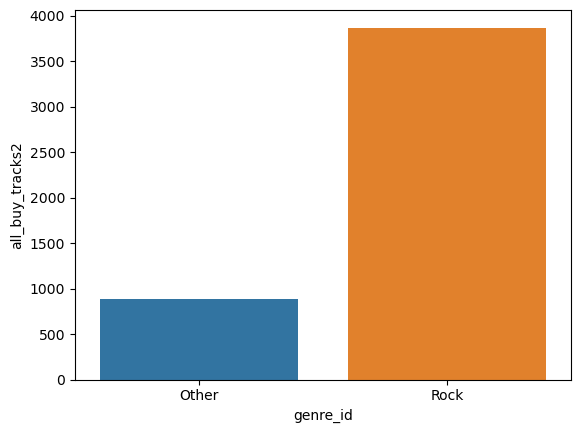

In [35]:
sns.barplot(x='genre_id', y='all_buy_tracks2', data=all_tracks)

In [109]:
all_tracks_cost=df.groupby(['genre_id'],as_index=False).agg(all_cost=('unit_price','sum'))
all_tracks_cost

,genre_id,all_cost
0,Other,877.14
1,Rock,3832.29


<Axes: xlabel='genre_id', ylabel='all_cost'>

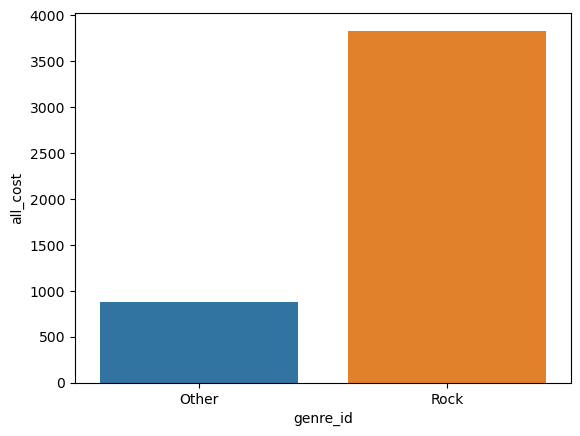

In [110]:
sns.barplot(x='genre_id', y='all_cost', data=all_tracks_cost)

###  Категории жанра рок намного более востребованные,чем остальные(более чем в 4 раза).Это говорит о том,что на эти категории стоит обращать больше внимания,ведь основной приток клиентов идет по этому каналу